<a href="https://colab.research.google.com/github/Pembo2008/engagement-recognition/blob/main/course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Recognition

In [ ]:
#@title

import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from skimage.util import random_noise

In [ ]:
#@title
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [ ]:
#@title
img = cv2.imread('max.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
#@title
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)

In [ ]:
#@title
cv2_imshow(img)

In [ ]:
#@title
!pip install -U albumentations
import os
import numpy as np
from sklearn.model_selection import train_test_split
import random
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras import optimizers 
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import SGD, Adam
!pip install opencv-python-headless==4.1.2.30
import cv2
import albumentations as A
from keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
from tensorflow.keras.utils import to_categorical
from random import seed
from random import randint
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
from keras.models import model_from_json
from sklearn.metrics import cohen_kappa_score, roc_auc_score, roc_curve,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

     |████████████████████████████████| 102 kB 11.3 MB/s 
     |████████████████████████████████| 47.8 MB 60 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


     |████████████████████████████████| 21.8 MB 16.0 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


In [ ]:
#@title
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
#@title
image = cv2.imread('/content/drive/MyDrive/project/1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
#@title
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

In [ ]:
#@title
print("Found {0} faces!".format(len(faces)))
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

Found 1 faces!


In [ ]:
#@title
from google.colab.patches import cv2_imshow

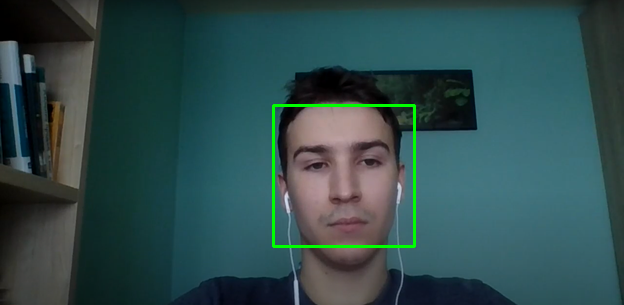

In [ ]:
#@title
cv2_imshow(image)

In [ ]:
#@title
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [ ]:
#@title
for (x,y,w,h) in faces:
    image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

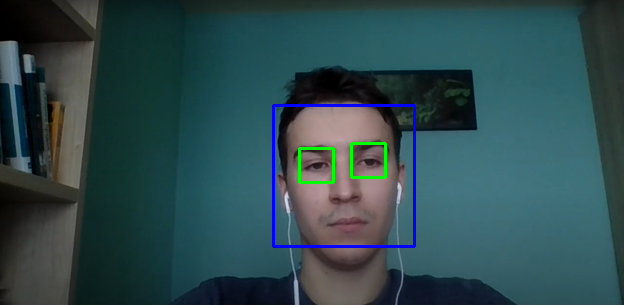

In [ ]:
#@title
for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2_imshow(image)

In [ ]:
#@title
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_mouth.xml')

In [ ]:
#@title
for (x,y,w,h) in faces:
    image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    mouth = mouth_cascade.detectMultiScale(gray, 1.7, 11)

error: ignored

In [ ]:
#@title
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + r'haarcascade_mcs_mouth.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + r'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + r'haarcascade_eye.xml')
nose_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + r'haarcascade_mcs_nose.xml')

In [ ]:
#@title
img = cv2.imread('/content/drive/MyDrive/project/1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
#@title
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

In [ ]:
#@title
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
    nose =  nose_cascade.detectMultiScale(gray, 1.3, 5)
    mouth = mouth_cascade.detectMultiScale(gray, 1.7, 11)

    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(img, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)
    for (nx, ny, nw, nh) in nose:
        cv2.rectangle(img, (nx, ny), (nx + nw, ny + nh), (0, 0, 255), 2)
    for (mx, my, mw, mh) in mouth:
        cv2.rectangle(img, (mx, my), (mx + mw, my + mh), (0, 0, 0), 2)

error: ignored

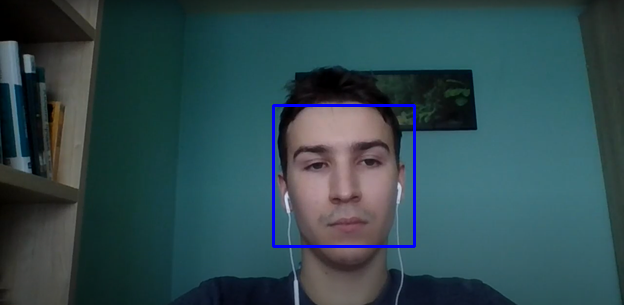

In [ ]:
#@title
cv2_imshow(img)

In [ ]:
#@title
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
#@title
classifier = load_model('/content/drive/MyDrive/project/ferjj.h5')

In [ ]:
#@title
class_labels = {0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Surprise'}
classes = list(class_labels.values())

In [ ]:
#@title
face_classifier = cv2.CascadeClassifier(cv2.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
#@title
def text_on_detected_boxes(text,text_x,text_y,image,font_scale = 1,
                           font = cv2.FONT_HERSHEY_SIMPLEX,
                           FONT_COLOR = (0, 0, 0),
                           FONT_THICKNESS = 2,
                           rectangle_bgr = (0, 255, 0)):
    (text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=2)[0]
    box_coords = ((text_x-10, text_y+4), (text_x + text_width+10, text_y - text_height-5))
    cv2.rectangle(image, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
    cv2.putText(image, text, (text_x, text_y), font, fontScale=font_scale, color=FONT_COLOR,thickness=FONT_THICKNESS)

In [ ]:
#@title
image = cv2.imread('/content/drive/MyDrive/project/1.png')

In [ ]:
#@title
def face_detector_image(img):
  gray = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
  faces = face_classifier.detectMultiScale(gray, 1.2, 5)
  if faces is ():
    return (0, 0, 0, 0), np.zeros((48, 48), np.uint8), img
  allfaces = []
  rects = []
  for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)
    allfaces.append(roi_gray)
    rects.append((x, w, y, h))
  return rects, allfaces, img

In [ ]:
#@title
def emotionImage(imgPath):
    img = cv2.imread(imgPath)
    rects, faces, image = face_detector_image(img)
    i = 0
    for face in faces:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        # make a prediction on the ROI, then lookup the class
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]
        label_position = (rects[i][0] + int((rects[i][1] / 2)), abs(rects[i][2] - 10))
        i = + 1
        # Overlay our detected emotion on the picture
        text_on_detected_boxes(label, label_position[0],label_position[1], image)
    cv2_imshow(image)

In [ ]:
#@title
face_detector_image(image)

([(272, 146, 107, 146)], [array([[126, 131, 125, ..., 109, 124, 114],
         [126,  99,  79, ...,  41,  83, 116],
         [126, 101,  71, ...,  46,  80, 115],
         ...,
         [126, 101,  79, ...,  91, 109, 130],
         [118, 149, 148, ..., 148, 149, 124],
         [ 76,  76,  77, ...,  89,  89,  89]], dtype=uint8)], array([[[ 0,  1,  2],
         [ 0,  1,  2],
         [ 0,  1,  2],
         ...,
         [32, 33, 31],
         [32, 34, 31],
         [32, 34, 31]],
 
        [[ 0,  1,  2],
         [ 0,  1,  2],
         [ 0,  1,  2],
         ...,
         [33, 35, 31],
         [33, 35, 31],
         [33, 35, 31]],
 
        [[ 0,  1,  2],
         [ 0,  1,  2],
         [ 0,  1,  2],
         ...,
         [33, 36, 30],
         [33, 35, 30],
         [33, 35, 30]],
 
        ...,
 
        [[17, 18, 19],
         [19, 20, 21],
         [22, 23, 25],
         ...,
         [60, 58, 35],
         [45, 44, 20],
         [39, 39, 15]],
 
        [[18, 19, 21],
         [19,

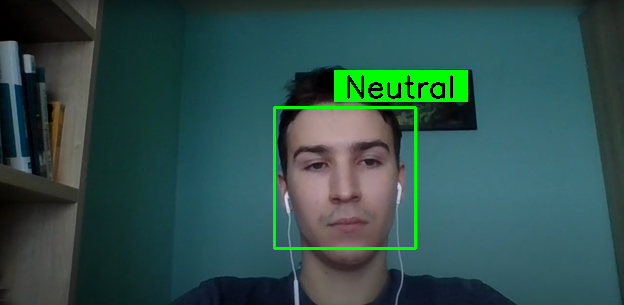

In [ ]:
#@title
emotionImage('/content/drive/MyDrive/project/1.png')

DAISEE

Daisee 2

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D,Conv3D, MaxPooling2D, TimeDistributed
from keras import applications
from keras.preprocessing import image 
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
from glob import glob
from tqdm import tqdm
from imageio import imread
from skimage.transform import resize
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms,datasets, models
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

In [ ]:
use_gpu = torch.cuda.is_available()
if use_gpu:
    pinMem = True
else:
    pinMem = False

batch_size = 128

path=r"/content/drive/MyDrive/project"
traindf=pd.read_csv(path+"/Labels/TrainLabels.csv",dtype=str)
valdf=pd.read_csv(path+"/Labels/ValidationLabels.csv",dtype=str)

In [ ]:
import cv2
def framer(path):
    vidcap = cv2.VideoCapture(path)
    success,image = vidcap.read()
    count = 0
    img = image
    while success:
      success,image = vidcap.read()
      if count == 300:
        img = image
        break
      count += 1
    return img

In [ ]:
import os
from PIL import Image
import cv2
import skimage.io
setdir = r"/content/drive/MyDrive/project/Dataset/Train/"
humans = os.listdir(setdir)
for human in humans:
    human_dir = setdir + human + "/"
    videos = os.listdir(human_dir)
    for video in videos:
        video_dir = human_dir + video + "/"
        pictures = os.listdir(video_dir)
        for i in pictures:
            img = Image.fromarray(framer(video_dir + i), 'RGB')
            imgUMat = np.float32(img)
            gr = cv2.cvtColor(imgUMat,cv2.COLOR_BGR2RGB)
            cv2.imwrite(video_dir + '51.jpg',gr)

AttributeError: ignored

In [ ]:
import os
from PIL import Image
import cv2
setdir = r"/content/drive/MyDrive/project/Dataset/Validation/"
humans = os.listdir(setdir)
for human in humans:
    human_dir = setdir + human + "/"
    videos = os.listdir(human_dir)
    for video in videos:
        video_dir = human_dir + video + "/"
        pictures = os.listdir(video_dir)
        for i in pictures:
            img = Image.fromarray(framer(video_dir + i), 'RGB')
            imgUMat = np.float32(img)
            gr = cv2.cvtColor(imgUMat,cv2.COLOR_BGR2RGB)
            cv2.imwrite(video_dir + '5.jpg',gr)

In [ ]:
 import os
from PIL import Image
import cv2
# creating an empty list
images = glob(path+"/Dataset/Train/*.jpg")
trainpart_image = []
train_image = []
trainpart_label = []
train_label = []

setdir = r"/content/drive/MyDrive/project/Dataset/Train/"
humans = os.listdir(setdir)
for human in humans:
    human_dir = setdir + human + "/"
    videos = os.listdir(human_dir)
    for video in videos:
        video_dir = human_dir + video + "/"
        pictures = os.listdir(video_dir)
        img = image.load_img(video_dir+'2.jpg', target_size=(224,224,3))
        # converting it to array
        img = image.img_to_array(img)
        # normalizing the pixel value
        img = img/255
        # appending the image to the train_image list
        trainpart_image.append(img)
        trainpart_label.append(float(traindf[traindf['ClipID']==video+'.avi']['Engagement']))
        train_image.append(trainpart_image)
        train_label.append(trainpart_label)
        trainpart_image=[]
        trainpart_label=[]
        
# converting the list to numpy array
X_train = np.stack(train_image[1:-1])
y_train = np.array(train_label[1:-1])
y_train = to_categorical(y_train)
y_train = y_train.reshape(673,1,4)

# shape of the array
print(X_train.shape)
print(y_train.shape)

# creating an empty list
images = glob(path+"/Dataset/Validation/*.jpg")
validationpart_image = []
validation_image = []
validationpart_label = []
validation_label = []

setdir_val = r"/content/drive/MyDrive/project/Dataset/Validation/"
humans_val = os.listdir(setdir_val)
for human_val in humans_val:
    human_dir_val = setdir_val + human_val + "/"
    videos_val = os.listdir(human_dir_val)
    for video_val in videos_val:
        video_dir_val = human_dir_val + video_val + "/"
        pictures = os.listdir(video_dir_val)
        img = image.load_img(video_dir_val+'2.jpg', target_size=(224,224,3))
        # converting it to array
        img = image.img_to_array(img)
        # normalizing the pixel value
        img = img/255
        # appending the image to the train_image list
        validationpart_image.append(img)
        validationpart_label.append(float(valdf[valdf['ClipID']==video_val+'.avi']['Engagement']))
        validation_image.append(validationpart_image)
        validation_label.append(validationpart_label)
        validationpart_image=[]
        validationpart_label=[]
        
# converting the list to numpy array
X_val = np.stack(validation_image[1:-1])
y_val = np.array(validation_label[1:-1])
y_val = to_categorical(y_val)
y_val = y_val.reshape(371,1,4)

# shape of the array
print(X_val.shape)
print(y_val.shape)

(673, 1, 224, 224, 3)
(673, 1, 4)
(371, 1, 224, 224, 3)
(371, 1, 4)


In [ ]:
d = [[1],[2],[3],[4],[5],[6],[7]]
d = np.array(d)
c = to_categorical(d)
print(c.reshape(7,1,8))

[[[0. 1. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 1. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 1. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1.]]]


In [ ]:
# img = Image.fromarray(framer('/content/drive/MyDrive/project/Dataset/Train/110002/1100021001/1100021001.avi'), 'RGB')
# gray = cv2.cvtColor(np.float32(img), cv2.COLOR_RGB2GRAY)
# cv2.imwrite('/content/drive/MyDrive/project/Dataset/Train/110002/1100021001/1.jpg' , gray)

True

In [ ]:
import tensorflow as tf
input_shape = (1, 224, 224, 3)

model = Sequential()
model.add(TimeDistributed(Conv2D(32, (5, 5), padding='same', activation='relu'),input_shape=input_shape))
model.add(TimeDistributed(Conv2D(32, (5, 5), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Conv2D(8, (5, 5), padding='same', activation='relu')))
model.add(TimeDistributed(Conv2D(8, (5, 5), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(Dense(4, activation='softmax'))

print(model.summary())

sgd = SGD(lr=0.00005, decay = 1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [ EarlyStopping(monitor='val_loss', patience=10, verbose=0), ModelCheckpoint('video_1_LSTM_1_1024.h5', monitor='val_loss', save_best_only=True, verbose=0) ]
nb_epoch = 10

model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=4, epochs=nb_epoch,callbacks=callbacks,verbose=1)
#model.fit_generator(generator=train_generator(size=size, batch_size=batch_size), steps_per_epoch = 1645782 // 30,epochs = 10, validation_data=validatio

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_90 (TimeDi  (None, 1, 224, 224, 32)  2432      
 stributed)                                                      
                                                                 
 time_distributed_91 (TimeDi  (None, 1, 220, 220, 32)  25632     
 stributed)                                                      
                                                                 
 time_distributed_92 (TimeDi  (None, 1, 110, 110, 32)  0         
 stributed)                                                      
                                                                 
 time_distributed_93 (TimeDi  (None, 1, 110, 110, 32)  0         
 stributed)                                                      
                                                                 
 time_distributed_94 (TimeDi  (None, 1, 110, 110, 8) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


169/169 [==============================] - 282s 2s/step - loss: 1.3796 - accuracy: 0.4487 - val_loss: 1.3683 - val_accuracy: 0.6119
Epoch 2/10
169/169 [==============================] - 274s 2s/step - loss: 1.3506 - accuracy: 0.5082 - val_loss: 1.3504 - val_accuracy: 0.6119
Epoch 3/10
169/169 [==============================] - 273s 2s/step - loss: 1.3217 - accuracy: 0.5126 - val_loss: 1.3299 - val_accuracy: 0.6119
Epoch 4/10
169/169 [==============================] - 275s 2s/step - loss: 1.2903 - accuracy: 0.5097 - val_loss: 1.3042 - val_accuracy: 0.6119
Epoch 5/10
169/169 [==============================] - 279s 2s/step - loss: 1.2543 - accuracy: 0.5067 - val_loss: 1.2703 - val_accuracy: 0.6119
Epoch 6/10
169/169 [==============================] - 279s 2s/step - loss: 1.2167 - accuracy: 0.5022 - val_loss: 1.2329 - val_accuracy: 0.6119
Epoch 7/10
169/169 [==============================] - 273s 2s/step - loss: 1.1790 - accuracy: 0.5067 - val_loss: 1.1973 - val_accuracy: 0.6119
Epoch 8/10

In [ ]:
 model.save("model_1.h5")

In [ ]:
testdf=pd.read_csv("/content/drive/MyDrive/project/Labels/TestLabels.csv",dtype=str)

In [ ]:
import os
from PIL import Image
import cv2
setdir = r"/content/drive/MyDrive/project/Dataset/Test/"
humans = os.listdir(setdir)
for human in humans:
    human_dir = setdir + human + "/"
    videos = os.listdir(human_dir)
    for video in videos:
        video_dir = human_dir + video + "/"
        pictures = os.listdir(video_dir)
        for i in pictures:
            img = Image.fromarray(framer(video_dir + i), 'RGB')
            gray = cv2.cvtColor(np.float32(img), cv2.COLOR_RGB2GRAY)
            cv2.imwrite(video_dir + '2.jpg' , gray)

In [ ]:
import os
from PIL import Image
import cv2
# creating an empty list
images = glob(path+"/Dataset/Test/*.jpg")
testpart_image = []
test_image = []
testpart_label = []
test_label = []

setdir = r"/content/drive/MyDrive/project/Dataset/Test/"
humans = os.listdir(setdir)
for human in humans:
    human_dir = setdir + human + "/"
    videos = os.listdir(human_dir)
    for video in videos:
        video_dir = human_dir + video + "/"
        pictures = os.listdir(video_dir)
        img = image.load_img(video_dir+'2.jpg', target_size=(224,224,3))
        # converting it to array
        img = image.img_to_array(img)
        # normalizing the pixel value
        img = img/255
        # appending the image to the train_image list
        testpart_image.append(img)
        testpart_label.append(float(testdf[testdf['ClipID']==video+'.avi']['Engagement']))
        test_image.append(testpart_image)
        test_label.append(testpart_label)
        testpart_image=[]
        testpart_label=[]
X_test = np.stack(test_image[1:-1])
y_test = np.array(test_label[1:-1])
y_test = to_categorical(y_test)
y_test = y_test.reshape(604,1,4)

# shape of the array
print(X_test.shape)
print(y_test.shape)

(604, 1, 224, 224, 3)
(604, 1, 4)


In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, batch_size=2, verbose=2)

print("Test Accuracy: " + str(test_acc))
print("Test Loss: " + str(test_loss))

302/302 - 124s - loss: 1.0950 - accuracy: 0.5728 - 124s/epoch - 411ms/step
Test Accuracy: 0.5728476643562317
Test Loss: 1.0950276851654053


Second Model

In [13]:
import os
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import svm,metrics,preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from collections import defaultdict
import os
import random
import numpy as np
from tqdm import tqdm
import time
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
import torch
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import TimeDistributed, GRU, Dense, Dropout, Flatten, LSTM, Activation, MaxPooling2D
from tensorflow.keras.regularizers import l2 as L2_reg
from tensorflow.keras.layers import Conv2D, BatchNormalization,MaxPool2D, GlobalMaxPool2D, Input, Masking, Conv3D, MaxPooling3D, GlobalMaxPool3D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.compat.v1.keras.backend import set_session 
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess=tf.compat.v1.Session(config=config)
set_session(sess)

In [14]:
device = torch.device('cuda')
device

device(type='cuda')

In [15]:
DATA_DIR = '/content/drive/MyDrive/project/Датасэт'

In [29]:
filename = '0_1(1).mp4'
fn, ext = os.path.splitext(os.path.basename(filename))
print(fn,ext)

0_1(1) .mp4


In [31]:
d = '/content/drive/MyDrive/project/Датасэт/Validation'
for filename in tqdm(os.listdir(d)):
    print(filename)

100%|██████████| 20/20 [00:00<00:00, 21188.70it/s]

3_4.mp4
2_4.mp4
3_4(8).mp4
3_1(1).mp4
0_1(4).mp4
1_2(1).mp4
2_2(1).mp4
3_3(1).mp4
2_3(2).mp4
1_5.mp4
3_5.mp4
2_5(1).mp4
3_5(5).mp4
0_6.mp4
1_7(3).mp4
2_7(5).mp4
2_7(6).mp4
0_8.mp4
1_8.mp4
2_8(1).mp4


In [32]:
def process_dir(dirname):
    print(dirname)
    d=os.path.join(DATA_DIR,dirname)
    for filename in tqdm(os.listdir(d)):
        if filename.lower().endswith('ini'):
            continue
        if os.path.isdir(os.path.join(d,filename)):
            videofile=None
            for fn in os.listdir(os.path.join(d,filename)):
                if fn.lower().endswith('ini'):
                    continue
                videofile=fn
            if videofile is None:
                print(filename)
                continue
            filename=os.path.join(filename,videofile)
        fn, ext = os.path.splitext(os.path.basename(filename))
        outdir=os.path.join(d,fn)
        if not os.path.exists(outdir):
            os.makedirs(outdir)
        command = "ffmpeg -i "+os.path.join(d,filename) + " -r 0.5 '"+outdir+"/%05d.png'"
        print(command)
        os.system(command=command)

process_dir('Test')

Test


  0%|          | 0/18 [00:00<?, ?it/s]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/3_4_2.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/3_4_2/%05d.png'


  6%|▌         | 1/18 [00:15<04:21, 15.39s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/1_4.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/1_4/%05d.png'


 11%|█         | 2/18 [00:23<02:54, 10.91s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/3_4_5.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/3_4_5/%05d.png'


 17%|█▋        | 3/18 [00:53<04:55, 19.71s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/3_4_6.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/3_4_6/%05d.png'


 22%|██▏       | 4/18 [01:53<08:20, 35.78s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/3_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/3_1/%05d.png'


 28%|██▊       | 5/18 [02:09<06:10, 28.51s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/0_1_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/0_1_1/%05d.png'


 33%|███▎      | 6/18 [02:49<06:28, 32.37s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/3_2.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/3_2/%05d.png'


 39%|███▉      | 7/18 [03:02<04:46, 26.02s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/1_2.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/1_2/%05d.png'


 44%|████▍     | 8/18 [04:05<06:19, 37.91s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/2_6_2.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/2_6_2/%05d.png'


 50%|█████     | 9/18 [04:46<05:50, 38.99s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/2_6_3.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/2_6_3/%05d.png'


 56%|█████▌    | 10/18 [05:52<06:16, 47.11s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/1_6_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/1_6_1/%05d.png'


 61%|██████    | 11/18 [06:15<04:39, 39.94s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/2_6_4.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/2_6_4/%05d.png'


 67%|██████▋   | 12/18 [06:44<03:38, 36.34s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/1_7.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/1_7/%05d.png'


 72%|███████▏  | 13/18 [07:01<02:32, 30.54s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/2_7.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/2_7/%05d.png'


 78%|███████▊  | 14/18 [07:41<02:13, 33.35s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/1_7_2.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/1_7_2/%05d.png'


 83%|████████▎ | 15/18 [08:37<02:00, 40.25s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/3_7.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/3_7/%05d.png'


 89%|████████▉ | 16/18 [08:56<01:07, 33.97s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/2_7_3.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/2_7_3/%05d.png'


 94%|█████████▍| 17/18 [09:52<00:40, 40.67s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Test/2_7_4.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Test/2_7_4/%05d.png'


100%|██████████| 18/18 [10:45<00:00, 35.86s/it]


In [33]:
process_dir('Train')

Train


  0%|          | 0/20 [00:00<?, ?it/s]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/1_3.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/1_3/%05d.png'


  5%|▌         | 1/20 [00:11<03:46, 11.95s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/0_5_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/0_5_1/%05d.png'


 10%|█         | 2/20 [00:28<04:25, 14.73s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/2_5.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/2_5/%05d.png'


 15%|█▌        | 3/20 [00:45<04:24, 15.55s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/2_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/2_1/%05d.png'


 20%|██        | 4/20 [00:53<03:26, 12.90s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/3_4_3.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/3_4_3/%05d.png'


 25%|██▌       | 5/20 [01:12<03:44, 14.94s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/3_2_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/3_2_1/%05d.png'


 30%|███       | 6/20 [01:30<03:45, 16.10s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/2_4_4.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/2_4_4/%05d.png'


 35%|███▌      | 7/20 [02:01<04:32, 20.94s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/3_4_4.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/3_4_4/%05d.png'


 40%|████      | 8/20 [02:58<06:29, 32.44s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/1_4_2.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/1_4_2/%05d.png'


 45%|████▌     | 9/20 [03:54<07:15, 39.59s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/0_5.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/0_5/%05d.png'


 50%|█████     | 10/20 [04:16<05:41, 34.15s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/1_5_2.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/1_5_2/%05d.png'


 55%|█████▌    | 11/20 [04:42<04:46, 31.79s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/2_4_3.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/2_4_3/%05d.png'


 60%|██████    | 12/20 [05:41<05:19, 39.91s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/1_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/1_1/%05d.png'


 65%|██████▌   | 13/20 [05:52<03:39, 31.34s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/0_1_3.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/0_1_3/%05d.png'


 70%|███████   | 14/20 [06:13<02:48, 28.10s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/1_6.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/1_6/%05d.png'


 75%|███████▌  | 15/20 [06:49<02:33, 30.63s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/2_8.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/2_8/%05d.png'


 80%|████████  | 16/20 [07:26<02:09, 32.45s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/2_4_2.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/2_4_2/%05d.png'


 85%|████████▌ | 17/20 [08:00<01:38, 32.93s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/1_5_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/1_5_1/%05d.png'


 90%|█████████ | 18/20 [08:28<01:03, 31.52s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/3_4_7.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/3_4_7/%05d.png'


 95%|█████████▌| 19/20 [09:25<00:39, 39.09s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Train/0_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Train/0_1/%05d.png'


100%|██████████| 20/20 [09:47<00:00, 29.39s/it]


In [34]:
process_dir('Validation')

Validation


  0%|          | 0/20 [00:00<?, ?it/s]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/3_4.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/3_4/%05d.png'


  5%|▌         | 1/20 [00:22<07:13, 22.79s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/2_4.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/2_4/%05d.png'


 10%|█         | 2/20 [00:33<04:45, 15.88s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/3_4_8.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/3_4_8/%05d.png'


 15%|█▌        | 3/20 [01:01<06:03, 21.36s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/3_1_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/3_1_1/%05d.png'


 20%|██        | 4/20 [01:11<04:29, 16.86s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/0_1_4.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/0_1_4/%05d.png'


 25%|██▌       | 5/20 [01:47<05:55, 23.71s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/1_2_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/1_2_1/%05d.png'


 30%|███       | 6/20 [02:29<06:59, 29.94s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/2_2_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/2_2_1/%05d.png'


 35%|███▌      | 7/20 [03:42<09:32, 44.01s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/3_3_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/3_3_1/%05d.png'


 40%|████      | 8/20 [04:30<09:04, 45.39s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/2_3_2.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/2_3_2/%05d.png'


 45%|████▌     | 9/20 [04:50<06:49, 37.27s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/1_5.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/1_5/%05d.png'


 50%|█████     | 10/20 [05:21<05:53, 35.37s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/3_5.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/3_5/%05d.png'


 55%|█████▌    | 11/20 [06:22<06:29, 43.31s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/2_5_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/2_5_1/%05d.png'


 60%|██████    | 12/20 [06:40<04:45, 35.68s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/3_5_5.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/3_5_5/%05d.png'


 65%|██████▌   | 13/20 [06:59<03:34, 30.60s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/0_6.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/0_6/%05d.png'


 70%|███████   | 14/20 [07:09<02:26, 24.37s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/1_7_3.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/1_7_3/%05d.png'


 75%|███████▌  | 15/20 [07:47<02:22, 28.50s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/2_7_5.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/2_7_5/%05d.png'


 80%|████████  | 16/20 [08:51<02:36, 39.02s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/2_7_6.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/2_7_6/%05d.png'


 85%|████████▌ | 17/20 [09:46<02:11, 43.93s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/0_8.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/0_8/%05d.png'


 90%|█████████ | 18/20 [10:38<01:32, 46.42s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/1_8.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/1_8/%05d.png'


 95%|█████████▌| 19/20 [11:26<00:46, 46.82s/it]

ffmpeg -i /content/drive/MyDrive/project/Датасэт/Validation/2_8_1.mp4 -r 0.5 '/content/drive/MyDrive/project/Датасэт/Validation/2_8_1/%05d.png'


100%|██████████| 20/20 [11:54<00:00, 35.74s/it]


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''
import argparse
import tensorflow as tf
import numpy as np
import cv2
import time

import subprocess, re 


def is_specialfile(path,exts):
    _, file_extension = os.path.splitext(path)
    return file_extension.lower() in exts

img_extensions=['.jpg','.jpeg','.png']
def is_image(path):
    return is_specialfile(path,img_extensions)

video_extensions=['.mov','.avi']
def is_video(path):
    return is_specialfile(path,video_extensions)
    
class FacialImageProcessing:
    # minsize: minimum of faces' size
    def __init__(self, print_stat=False, minsize = 32):
        self.print_stat=print_stat
        self.minsize=minsize
        
        models_path,_ = os.path.split(os.path.realpath(__file__))
        models_path=os.path.join(models_path,'..','models','pretrained_faces')
        model_files={os.path.join(models_path,'mtcnn.pb'):''}

        with tf.Graph().as_default() as full_graph:
            for model_file in model_files:
                tf.import_graph_def(FacialImageProcessing.load_graph_def(model_file), name=model_files[model_file])
        self.sess=tf.compat.v1.Session(graph=full_graph)#,config=tf.ConfigProto(device_count={'CPU':1,'GPU':0}))
        self.pnet, self.rnet, self.onet = FacialImageProcessing.load_mtcnn(self.sess,full_graph)     

    def close(self):
        self.sess.close()
    
    @staticmethod
    def load_graph_def(frozen_graph_filename):
        graph_def=None
        with tf.io.gfile.GFile(frozen_graph_filename, 'rb') as f:
            graph_def = tf.compat.v1.GraphDef()
            graph_def.ParseFromString(f.read())
        return graph_def
    
    @staticmethod
    def load_graph(frozen_graph_filename, prefix=''):
        graph_def = FacialImageProcessing.load_graph_def(frozen_graph_filename)
        with tf.Graph().as_default() as graph:
            tf.import_graph_def(graph_def, name=prefix)
        return graph

    @staticmethod
    def load_mtcnn(sess,graph):
        pnet_out_1=graph.get_tensor_by_name('pnet/conv4-2/BiasAdd:0')
        pnet_out_2=graph.get_tensor_by_name('pnet/prob1:0')
        pnet_in=graph.get_tensor_by_name('pnet/input:0')
        
        rnet_out_1=graph.get_tensor_by_name('rnet/conv5-2/conv5-2:0')
        rnet_out_2=graph.get_tensor_by_name('rnet/prob1:0')
        rnet_in=graph.get_tensor_by_name('rnet/input:0')
        
        onet_out_1=graph.get_tensor_by_name('onet/conv6-2/conv6-2:0')
        onet_out_2=graph.get_tensor_by_name('onet/conv6-3/conv6-3:0')
        onet_out_3=graph.get_tensor_by_name('onet/prob1:0')
        onet_in=graph.get_tensor_by_name('onet/input:0')
        
        pnet_fun = lambda img : sess.run((pnet_out_1, pnet_out_2), feed_dict={pnet_in:img})
        rnet_fun = lambda img : sess.run((rnet_out_1, rnet_out_2), feed_dict={rnet_in:img})
        onet_fun = lambda img : sess.run((onet_out_1, onet_out_2, onet_out_3), feed_dict={onet_in:img})
        return pnet_fun, rnet_fun, onet_fun
        
    @staticmethod
    def bbreg(boundingbox,reg):
        # calibrate bounding boxes
        if reg.shape[1]==1:
            reg = np.reshape(reg, (reg.shape[2], reg.shape[3]))

        w = boundingbox[:,2]-boundingbox[:,0]+1
        h = boundingbox[:,3]-boundingbox[:,1]+1
        b1 = boundingbox[:,0]+reg[:,0]*w
        b2 = boundingbox[:,1]+reg[:,1]*h
        b3 = boundingbox[:,2]+reg[:,2]*w
        b4 = boundingbox[:,3]+reg[:,3]*h
        boundingbox[:,0:4] = np.transpose(np.vstack([b1, b2, b3, b4 ]))
        return boundingbox
     
    @staticmethod
    def generateBoundingBox(imap, reg, scale, t):
        # use heatmap to generate bounding boxes
        stride=2
        cellsize=12

        imap = np.transpose(imap)
        dx1 = np.transpose(reg[:,:,0])
        dy1 = np.transpose(reg[:,:,1])
        dx2 = np.transpose(reg[:,:,2])
        dy2 = np.transpose(reg[:,:,3])
        y, x = np.where(imap >= t)
        if y.shape[0]==1:
            dx1 = np.flipud(dx1)
            dy1 = np.flipud(dy1)
            dx2 = np.flipud(dx2)
            dy2 = np.flipud(dy2)
        score = imap[(y,x)]
        reg = np.transpose(np.vstack([ dx1[(y,x)], dy1[(y,x)], dx2[(y,x)], dy2[(y,x)] ]))
        if reg.size==0:
            reg = np.empty((0,3))
        bb = np.transpose(np.vstack([y,x]))
        q1 = np.fix((stride*bb+1)/scale)
        q2 = np.fix((stride*bb+cellsize-1+1)/scale)
        boundingbox = np.hstack([q1, q2, np.expand_dims(score,1), reg])
        return boundingbox, reg
     
    # function pick = nms(boxes,threshold,type)
    @staticmethod
    def nms(boxes, threshold, method):
        if boxes.size==0:
            return np.empty((0,3))
        x1 = boxes[:,0]
        y1 = boxes[:,1]
        x2 = boxes[:,2]
        y2 = boxes[:,3]
        s = boxes[:,4]
        area = (x2-x1+1) * (y2-y1+1)
        I = np.argsort(s)
        pick = np.zeros_like(s, dtype=np.int16)
        counter = 0
        while I.size>0:
            i = I[-1]
            pick[counter] = i
            counter += 1
            idx = I[0:-1]
            xx1 = np.maximum(x1[i], x1[idx])
            yy1 = np.maximum(y1[i], y1[idx])
            xx2 = np.minimum(x2[i], x2[idx])
            yy2 = np.minimum(y2[i], y2[idx])
            w = np.maximum(0.0, xx2-xx1+1)
            h = np.maximum(0.0, yy2-yy1+1)
            inter = w * h
            if method == 'Min':
                o = inter / np.minimum(area[i], area[idx])
            else:
                o = inter / (area[i] + area[idx] - inter)
            I = I[np.where(o<=threshold)]
        pick = pick[0:counter]
        return pick

    # function [dy edy dx edx y ey x ex tmpw tmph] = pad(total_boxes,w,h)
    @staticmethod
    def pad(total_boxes, w, h):
        # compute the padding coordinates (pad the bounding boxes to square)
        tmpw = (total_boxes[:,2]-total_boxes[:,0]+1).astype(np.int32)
        tmph = (total_boxes[:,3]-total_boxes[:,1]+1).astype(np.int32)
        numbox = total_boxes.shape[0]

        dx = np.ones((numbox), dtype=np.int32)
        dy = np.ones((numbox), dtype=np.int32)
        edx = tmpw.copy().astype(np.int32)
        edy = tmph.copy().astype(np.int32)

        x = total_boxes[:,0].copy().astype(np.int32)
        y = total_boxes[:,1].copy().astype(np.int32)
        ex = total_boxes[:,2].copy().astype(np.int32)
        ey = total_boxes[:,3].copy().astype(np.int32)

        tmp = np.where(ex>w)
        edx.flat[tmp] = np.expand_dims(-ex[tmp]+w+tmpw[tmp],1)
        ex[tmp] = w
        
        tmp = np.where(ey>h)
        edy.flat[tmp] = np.expand_dims(-ey[tmp]+h+tmph[tmp],1)
        ey[tmp] = h

        tmp = np.where(x<1)
        dx.flat[tmp] = np.expand_dims(2-x[tmp],1)
        x[tmp] = 1

        tmp = np.where(y<1)
        dy.flat[tmp] = np.expand_dims(2-y[tmp],1)
        y[tmp] = 1
        
        return dy, edy, dx, edx, y, ey, x, ex, tmpw, tmph

    # function [bboxA] = rerec(bboxA)
    @staticmethod
    def rerec(bboxA):
        # convert bboxA to square
        h = bboxA[:,3]-bboxA[:,1]
        w = bboxA[:,2]-bboxA[:,0]
        l = np.maximum(w, h)
        bboxA[:,0] = bboxA[:,0]+w*0.5-l*0.5
        bboxA[:,1] = bboxA[:,1]+h*0.5-l*0.5
        bboxA[:,2:4] = bboxA[:,0:2] + np.transpose(np.tile(l,(2,1)))
        return bboxA

    def detect_faces(self,img):
        # im: input image
        # threshold: threshold=[th1 th2 th3], th1-3 are three steps's threshold
        threshold = [ 0.6, 0.7, 0.9 ]  # three steps's threshold
        # fastresize: resize img from last scale (using in high-resolution images) if fastresize==true
        factor = 0.709 # scale factor
        factor_count=0
        total_boxes=np.empty((0,9))
        points=np.array([])
        h=img.shape[0]
        w=img.shape[1]
        minl=np.amin([h, w])
        m=12.0/self.minsize
        minl=minl*m
        # creat scale pyramid
        scales=[]
        while minl>=12:
            scales += [m*np.power(factor, factor_count)]
            minl = minl*factor
            factor_count += 1

        # first stage
        #t=time.time()
        for j in range(len(scales)):
            scale=scales[j]
            hs=int(np.ceil(h*scale))
            ws=int(np.ceil(w*scale))
            im_data = cv2.resize(img, (ws,hs), interpolation=cv2.INTER_AREA)
            im_data = (im_data-127.5)*0.0078125
            img_x = np.expand_dims(im_data, 0)
            img_y = np.transpose(img_x, (0,2,1,3))
            out = self.pnet(img_y)
            out0 = np.transpose(out[0], (0,2,1,3))
            out1 = np.transpose(out[1], (0,2,1,3))
            
            boxes, _ = FacialImageProcessing.generateBoundingBox(out1[0,:,:,1].copy(), out0[0,:,:,:].copy(), scale, threshold[0])
            
            # inter-scale nms
            pick = FacialImageProcessing.nms(boxes.copy(), 0.5, 'Union')
            if boxes.size>0 and pick.size>0:
                boxes = boxes[pick,:]
                total_boxes = np.append(total_boxes, boxes, axis=0)
        numbox = total_boxes.shape[0]
        #elapsed = time.time() - t
        #print('1 phase nb=%d elapsed=%f'%(numbox,elapsed))
        if numbox>0:
            pick = FacialImageProcessing.nms(total_boxes.copy(), 0.7, 'Union')
            total_boxes = total_boxes[pick,:]
            regw = total_boxes[:,2]-total_boxes[:,0]
            regh = total_boxes[:,3]-total_boxes[:,1]
            qq1 = total_boxes[:,0]+total_boxes[:,5]*regw
            qq2 = total_boxes[:,1]+total_boxes[:,6]*regh
            qq3 = total_boxes[:,2]+total_boxes[:,7]*regw
            qq4 = total_boxes[:,3]+total_boxes[:,8]*regh
            total_boxes = np.transpose(np.vstack([qq1, qq2, qq3, qq4, total_boxes[:,4]]))
            total_boxes = FacialImageProcessing.rerec(total_boxes.copy())
            total_boxes[:,0:4] = np.fix(total_boxes[:,0:4]).astype(np.int32)
            dy, edy, dx, edx, y, ey, x, ex, tmpw, tmph = FacialImageProcessing.pad(total_boxes.copy(), w, h)

        numbox = total_boxes.shape[0]
        #elapsed = time.time() - t
        #print('2 phase nb=%d elapsed=%f'%(numbox,elapsed))
        if numbox>0:
            # second stage
            tempimg = np.zeros((24,24,3,numbox))
            for k in range(0,numbox):
                tmp = np.zeros((int(tmph[k]),int(tmpw[k]),3))
                tmp[dy[k]-1:edy[k],dx[k]-1:edx[k],:] = img[y[k]-1:ey[k],x[k]-1:ex[k],:]
                if tmp.shape[0]>0 and tmp.shape[1]>0 or tmp.shape[0]==0 and tmp.shape[1]==0:
                    tempimg[:,:,:,k] = cv2.resize(tmp, (24,24), interpolation=cv2.INTER_AREA)
                else:
                    return np.empty()
            tempimg = (tempimg-127.5)*0.0078125
            tempimg1 = np.transpose(tempimg, (3,1,0,2))
            out = self.rnet(tempimg1)
            out0 = np.transpose(out[0])
            out1 = np.transpose(out[1])
            score = out1[1,:]
            ipass = np.where(score>threshold[1])
            total_boxes = np.hstack([total_boxes[ipass[0],0:4].copy(), np.expand_dims(score[ipass].copy(),1)])
            mv = out0[:,ipass[0]]
            if total_boxes.shape[0]>0:
                pick = FacialImageProcessing.nms(total_boxes, 0.7, 'Union')
                total_boxes = total_boxes[pick,:]
                total_boxes = FacialImageProcessing.bbreg(total_boxes.copy(), np.transpose(mv[:,pick]))
                total_boxes = FacialImageProcessing.rerec(total_boxes.copy())

        numbox = total_boxes.shape[0]
        #elapsed = time.time() - t
        #print('3 phase nb=%d elapsed=%f'%(numbox,elapsed))
        if numbox>0:
            # third stage
            total_boxes = np.fix(total_boxes).astype(np.int32)
            dy, edy, dx, edx, y, ey, x, ex, tmpw, tmph = FacialImageProcessing.pad(total_boxes.copy(), w, h)
            tempimg = np.zeros((48,48,3,numbox))
            for k in range(0,numbox):
                tmp = np.zeros((int(tmph[k]),int(tmpw[k]),3))
                tmp[dy[k]-1:edy[k],dx[k]-1:edx[k],:] = img[y[k]-1:ey[k],x[k]-1:ex[k],:]
                if tmp.shape[0]>0 and tmp.shape[1]>0 or tmp.shape[0]==0 and tmp.shape[1]==0:
                    tempimg[:,:,:,k] = cv2.resize(tmp, (48,48), interpolation=cv2.INTER_AREA)
                else:
                    return np.empty()
            tempimg = (tempimg-127.5)*0.0078125
            tempimg1 = np.transpose(tempimg, (3,1,0,2))
            out = self.onet(tempimg1)
            out0 = np.transpose(out[0])
            out1 = np.transpose(out[1])
            out2 = np.transpose(out[2])
            score = out2[1,:]
            points = out1
            ipass = np.where(score>threshold[2])
            points = points[:,ipass[0]]
            total_boxes = np.hstack([total_boxes[ipass[0],0:4].copy(), np.expand_dims(score[ipass].copy(),1)])
            mv = out0[:,ipass[0]]

            w = total_boxes[:,2]-total_boxes[:,0]+1
            h = total_boxes[:,3]-total_boxes[:,1]+1
            points[0:5,:] = np.tile(w,(5, 1))*points[0:5,:] + np.tile(total_boxes[:,0],(5, 1))-1
            points[5:10,:] = np.tile(h,(5, 1))*points[5:10,:] + np.tile(total_boxes[:,1],(5, 1))-1
            if total_boxes.shape[0]>0:
                total_boxes = FacialImageProcessing.bbreg(total_boxes.copy(), np.transpose(mv))
                pick = FacialImageProcessing.nms(total_boxes.copy(), 0.7, 'Min')
                total_boxes = total_boxes[pick,:]
                points = points[:,pick]
        #elapsed = time.time() - t
        #print('4 phase elapsed=%f'%(elapsed))            
        return total_boxes, points

In [ ]:
imgProcessing=FacialImageProcessing(False)